<h1>Prova integrativa di "Complessità nei sistemi e nelle reti"</h1>

##### Network analysis of (the giant component of) the network of users of the Pretty-Good-Privacy algorithm for secure information interchange.
DATASET available at https://networkrepository.com/tech-pgp.php

PGP is a standard for secure communications by means of a systematic integration of both asymmetric and symmetric cryptographic primitives. It has been widely adopted as a standard for confidential and authenticated message exchanges. Identities in PGP are managed using digital certificates distributed according to the Web-of-Trust certification paradigm, where each communicating entity is also a certification authority.
This network represents message interchange among PGP users [1]. 

- giant component of the network of users of the Pretty-Good-Privacy algorithm for secure information interchange
- undirected unweighted graph

In [1]:
import networkx as nx 
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
with open('./tech-pgp.edges', 'rb') as f: 
    lines = f.readlines()
G = nx.read_edgelist(lines[1:-1]) 

### Network properties

In [3]:
edges = G.size() 
s = len(list(nx.connected_components(G)))
nodes = len(nx.nodes(G)) 
has_self_loops = len(list(nx.selfloop_edges(G)))  > 0 

print(f"The network is made up of {s} connected component") # no isolated nodes 
print(f"It consists of {nodes} nodes") 
print(f'The network is made up of {edges} edges')  
if not has_self_loops: 
    print("No self loops") 

The network is made up of 1 connected component
It consists of 10680 nodes
The network is made up of 24315 edges
No self loops


In [4]:
density = nx.density(G) 

In [5]:
avg_distance = nx.average_shortest_path_length(G) # small world 

In [6]:
diameter = nx.diameter(G) 

In [7]:
clustering_coefficients = nx.clustering(G) 
avg_clustering_coefficient = nx.average_clustering(G)  

#### Degree analysis
https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

In [8]:
degrees = nx.degree(G)  
avg_degree = 0.0 
max_degree = max(n for _, n in degrees)  
for _ , deg in degrees: 
    avg_degree += deg
avg_degree = avg_degree / nodes ; 

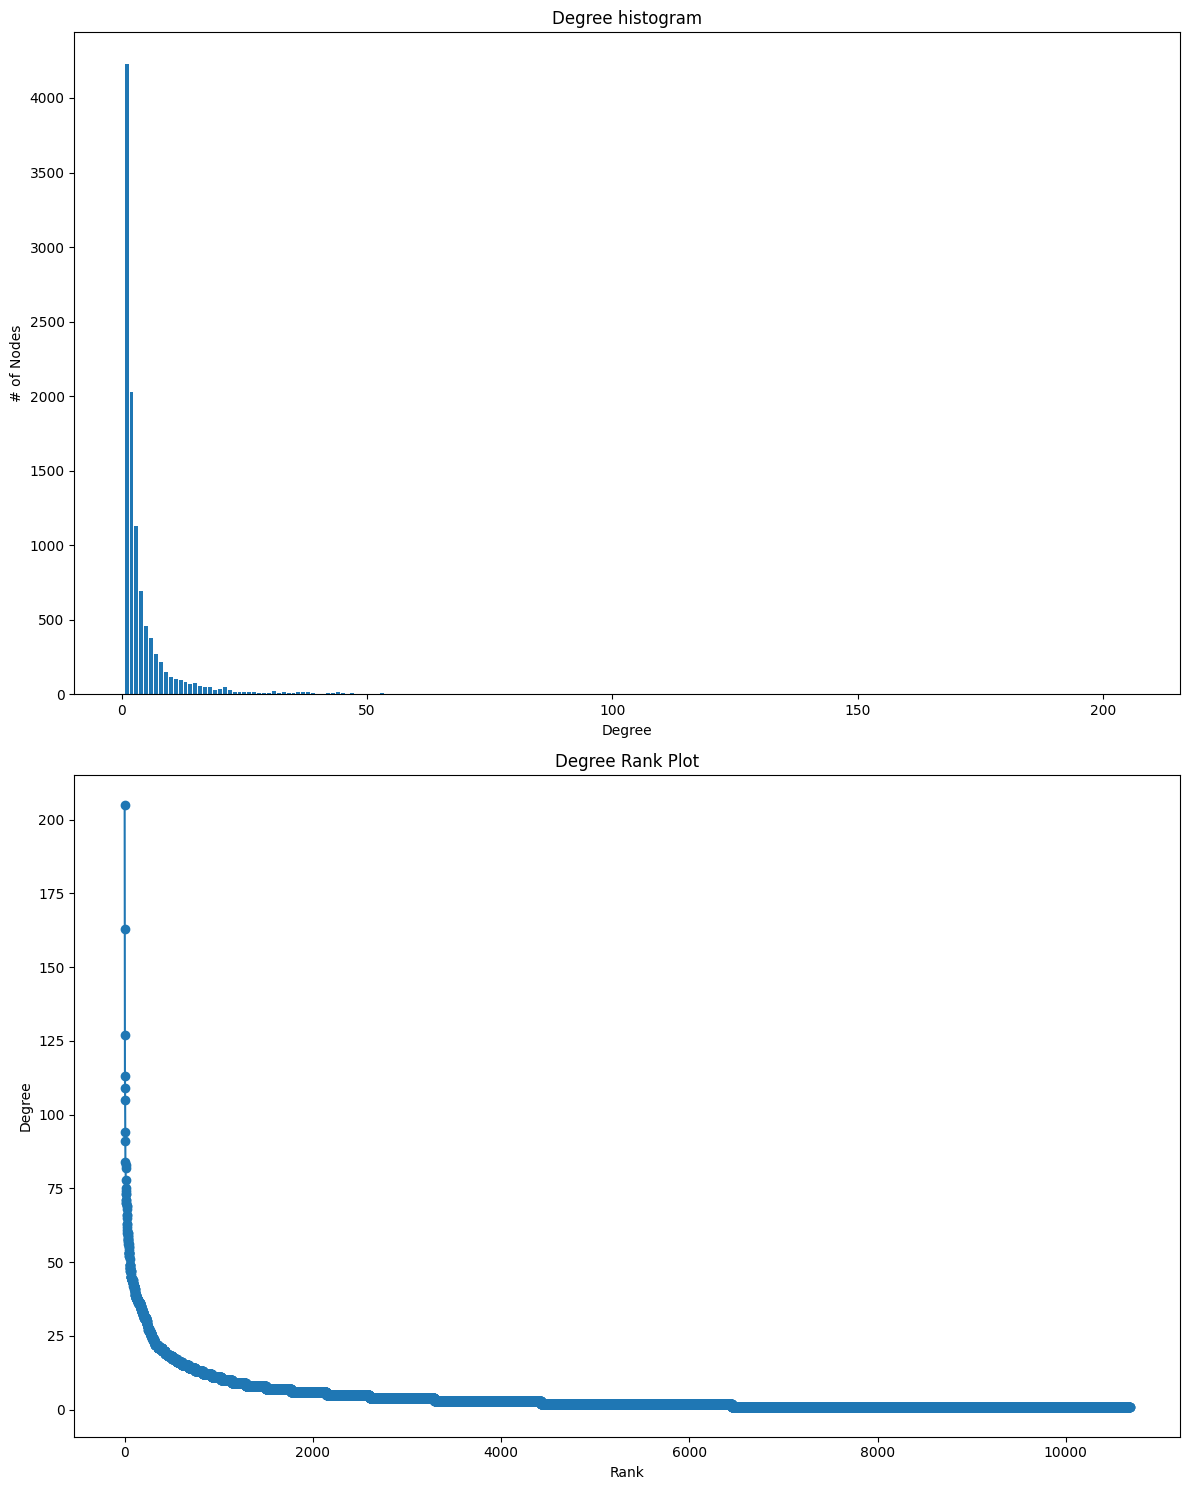

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(12, 15)); 

# degree dist 
degree_sequence = sorted((d for n, d in degrees), reverse=True); 
ax0 = axs[0] 
ax0.bar(*np.unique(degree_sequence, return_counts=True))
ax0.set_title("Degree histogram")
ax0.set_xlabel("Degree")
ax0.set_ylabel("# of Nodes")

ax1 = axs[1] 
ax1.plot(degree_sequence,  marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank") ; 
# degree hist 
fig.tight_layout() 
plt.show() 

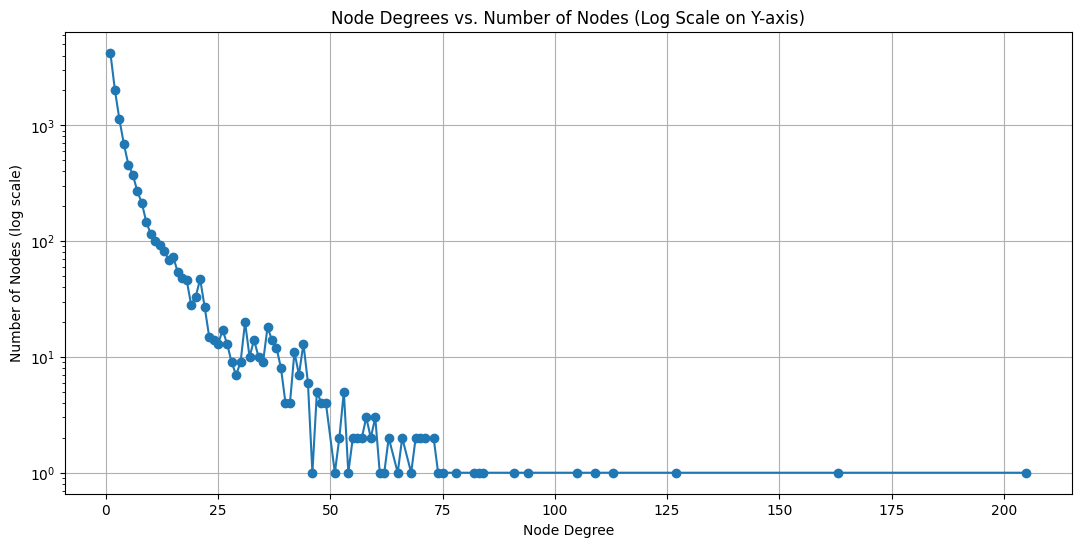

In [50]:
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)


# Create a logarithmic scale for both x and y axes
plt.figure(figsize=(13, 6))
plt.plot(unique_degrees, counts, marker='o', linestyle='-')
plt.yscale('log')  # Set a logarithmic scale for the y-axis
plt.title('Node Degrees vs. Number of Nodes (Log Scale on Y-axis)')
plt.xlabel('Node Degree')
plt.ylabel('Number of Nodes (log scale)')

plt.grid(True)
plt.show()

In [11]:
assortativity = nx.degree_assortativity_coefficient(G) 

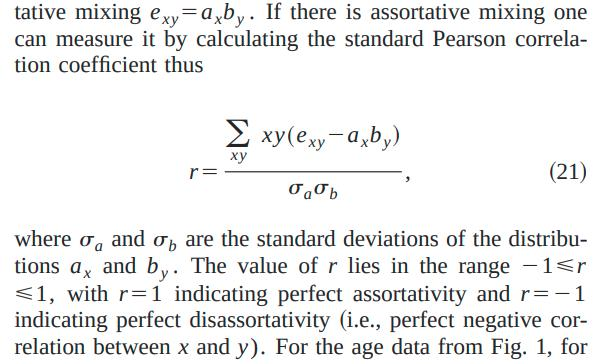

In [12]:
img = Image.open('assortativity_index.jpeg')
img_resized = img.resize((400, 400))
display(img)

In [37]:
assortativity 

0.23821421681693006

Image from <b>"M. E. J. Newman, Mixing patterns in networks, Physical Review E, 67 026126, 2003"</b> 



#### Centralities

In [13]:
betweeness = nx.betweenness_centrality(G) 
avg_bet_centrality = np.mean(list(betweeness.values())) 

In [14]:
avg_deg_centrality = np.mean(list(x for _,x in degrees))/nodes

In [15]:
closeness = nx.closeness_centrality(G) 

In [16]:
avg_clo_centrality = np.mean(list(closeness.values())) 

In [17]:
eiv_centrality = nx.eigenvector_centrality(G) 
avg_eiv_centrality = np.mean(list(eiv_centrality.values())) 

In [36]:
print(f"Betweenness Centrality:\t\t{avg_bet_centrality:3.5f}.") 
print(f"Degree Centrality:\t\t{avg_deg_centrality:3.5f}.") 
print(f"Closeness Centrality:\t\t{avg_clo_centrality:3.5f}.") 
print(f"Eigenvector Centrality:\t\t{avg_eiv_centrality:3.5f}.") 

Betweenness Centrality:		0.00061.
Degree Centrality:		0.00043.
Closeness Centrality:		0.13839.
Eigenvector Centrality:		0.00123.


In [31]:
# short summary 
print(f"Average degree:\t\t{avg_degree:3.2f}.") 
print(f"Maximum degree:\t\t{max_degree:3.2f}.") 
print(f"Density:    \t\t{density:3.6f}") 
print(f"Average distance:\t{avg_distance:3.2f}") 
print(f"Diameter:\t\t{diameter:3.2f}") 
print(f"Clustering coefficient:\t{avg_clustering_coefficient:3.2f}")   
print(f"Assortativity:\t\t{assortativity:3.2f}") # not really assortative
 

Average degree:		4.55.
Maximum degree:		205.00.
Density:    		0.000426
Average distance:	7.49
Diameter:		24.00
Clustering coefficient:	0.27
Assortativity:		0.24


### Community analysis

There are 41 nodes in the 31-core subgraph


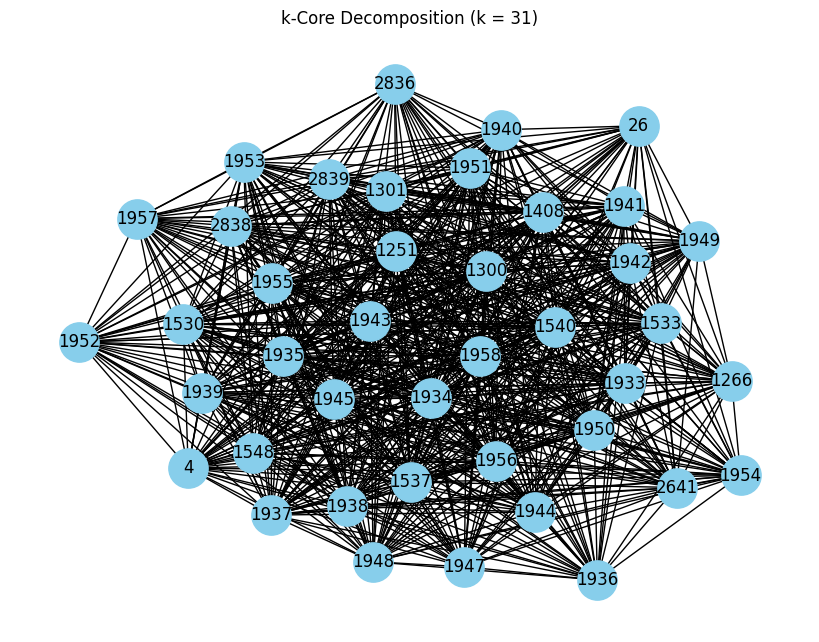

There are 41 nodes in the 30-core subgraph


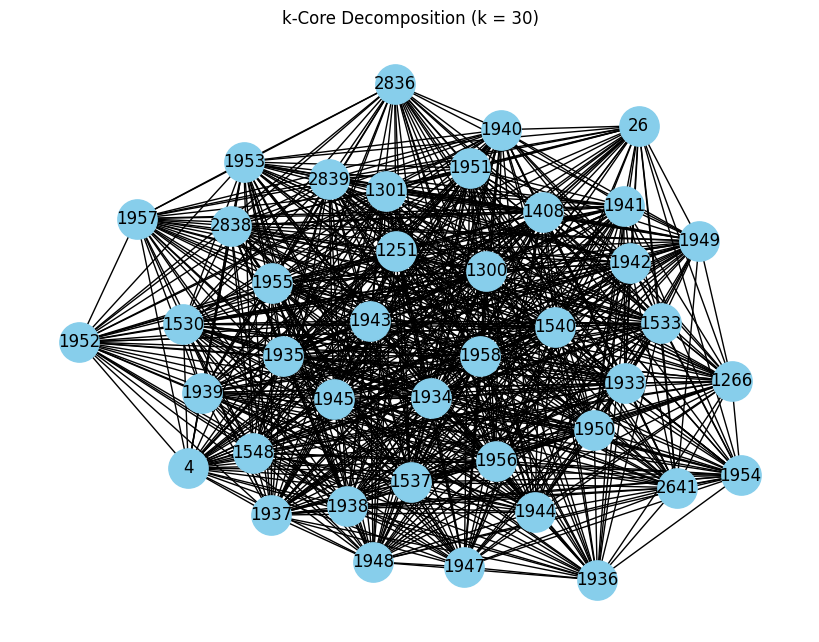

There are 43 nodes in the 29-core subgraph


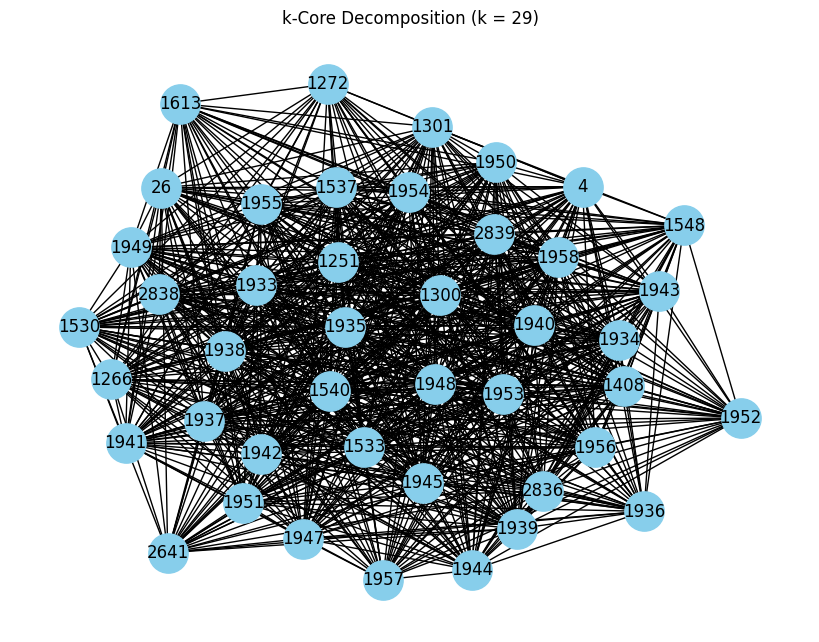

There are 115 nodes in the 28-core subgraph


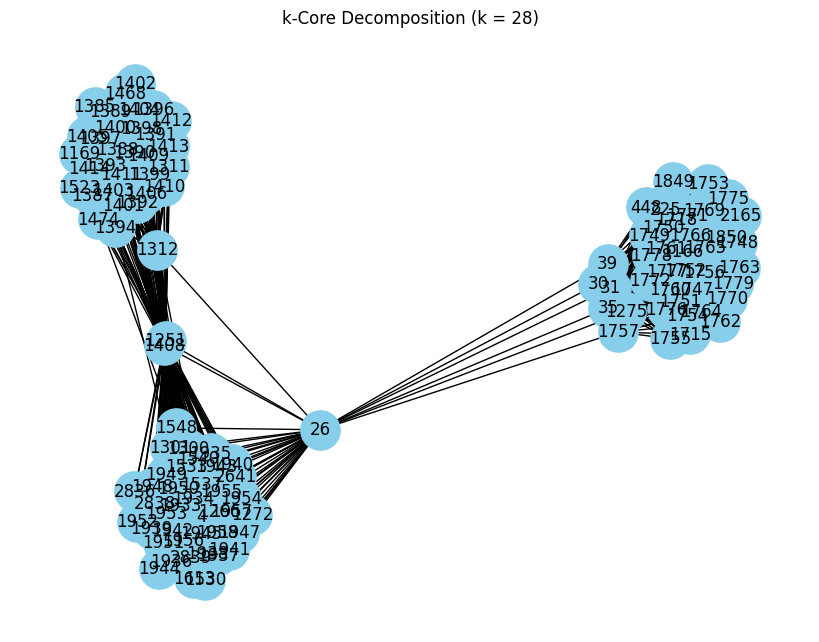

There are 121 nodes in the 27-core subgraph


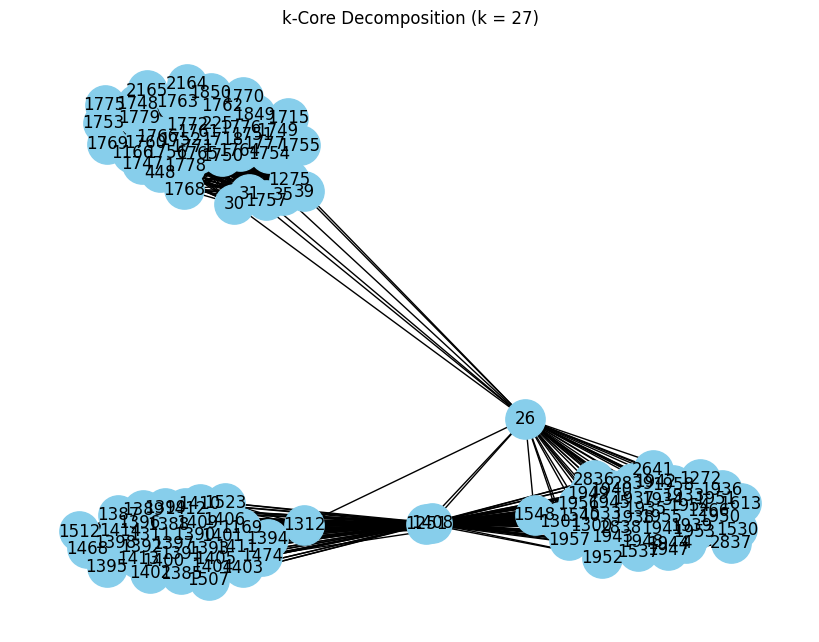

There are 124 nodes in the 26-core subgraph


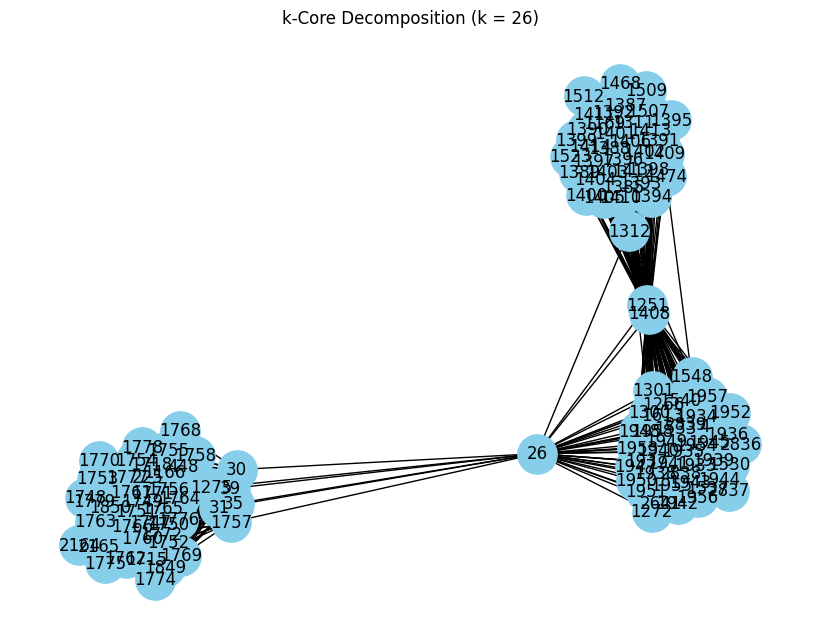

There are 126 nodes in the 25-core subgraph


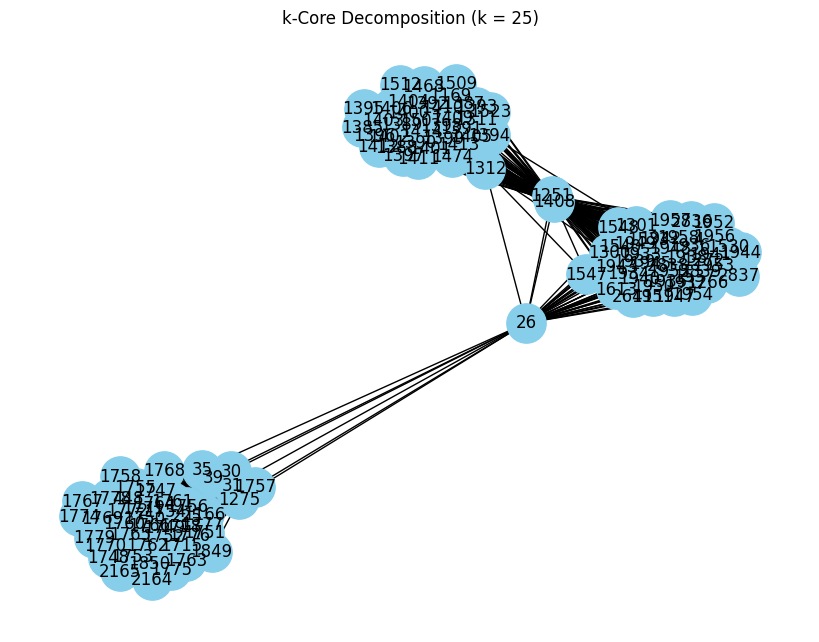

There are 126 nodes in the 24-core subgraph


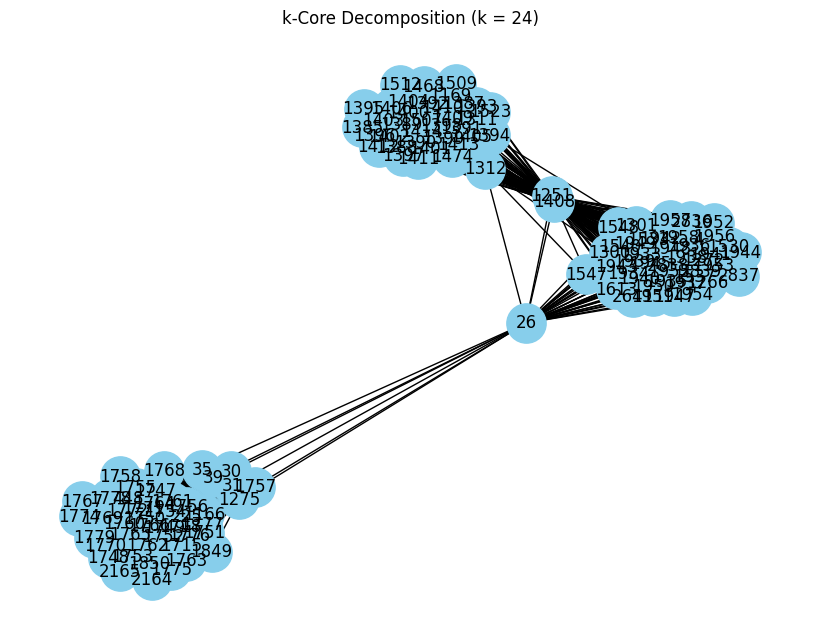

There are 126 nodes in the 23-core subgraph


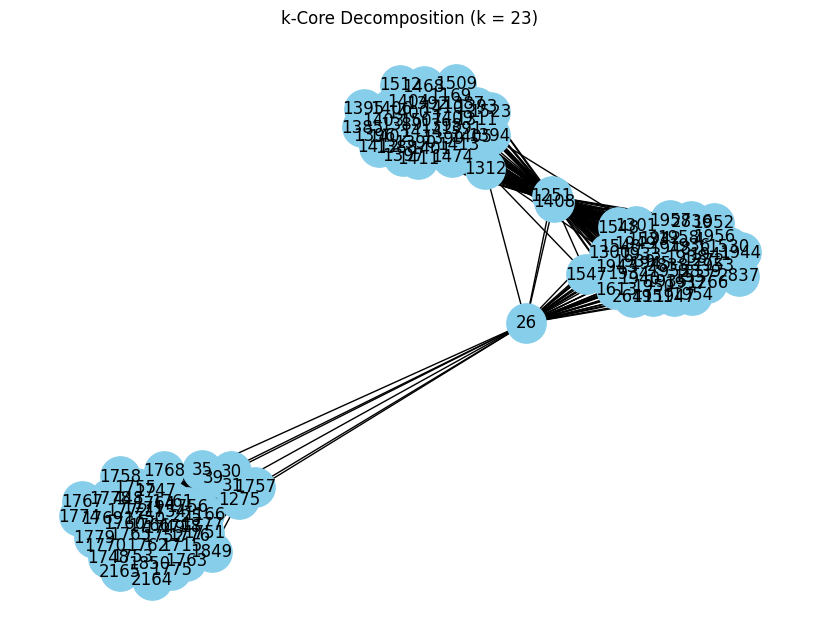

There are 145 nodes in the 22-core subgraph


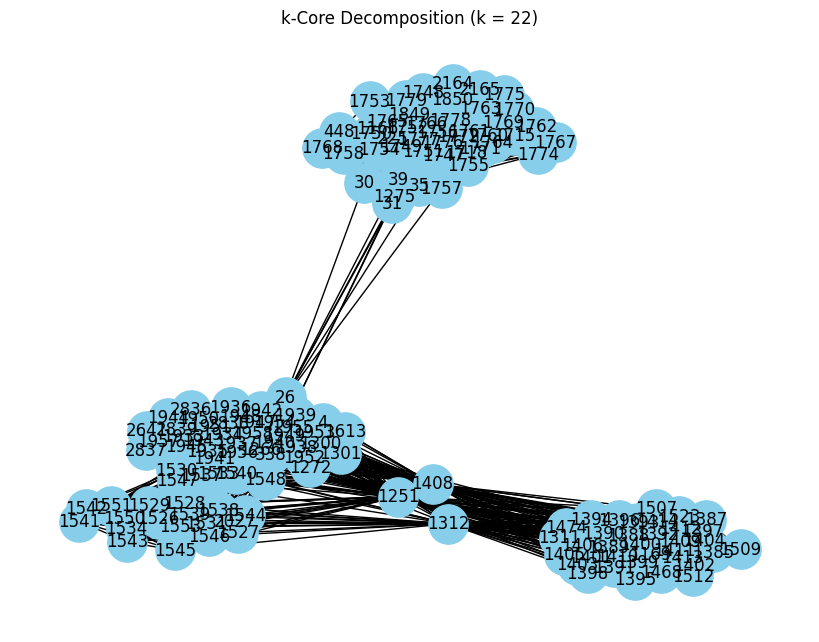

There are 171 nodes in the 21-core subgraph


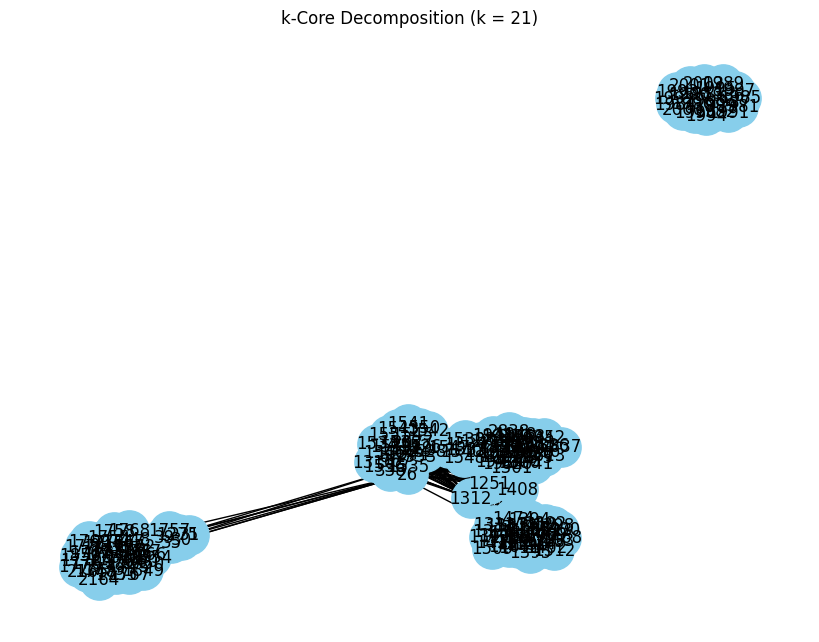

There are 172 nodes in the 20-core subgraph


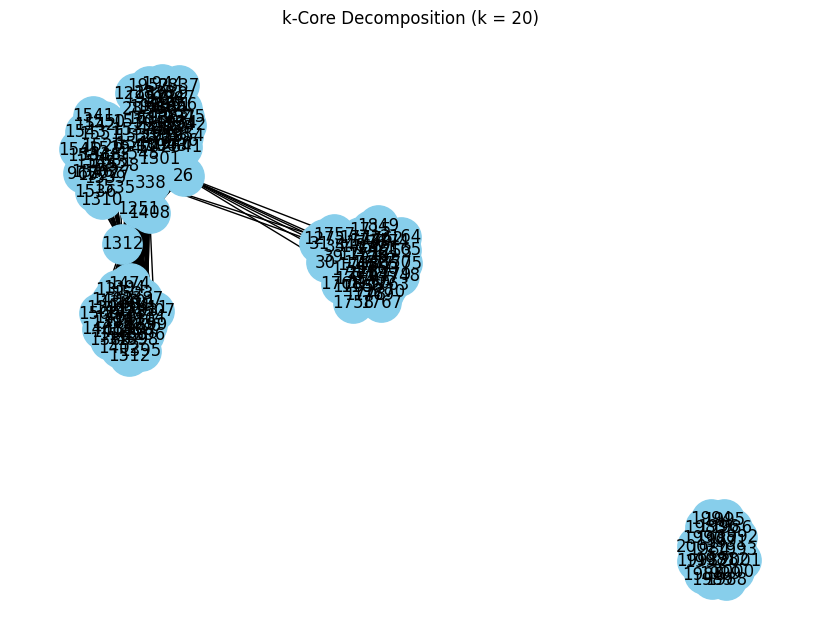

There are 172 nodes in the 19-core subgraph


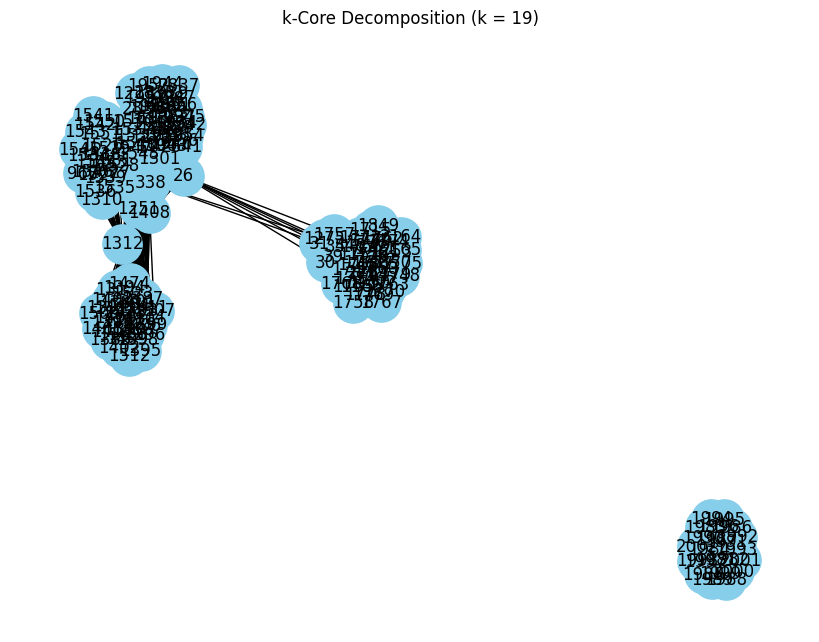

There are 172 nodes in the 18-core subgraph


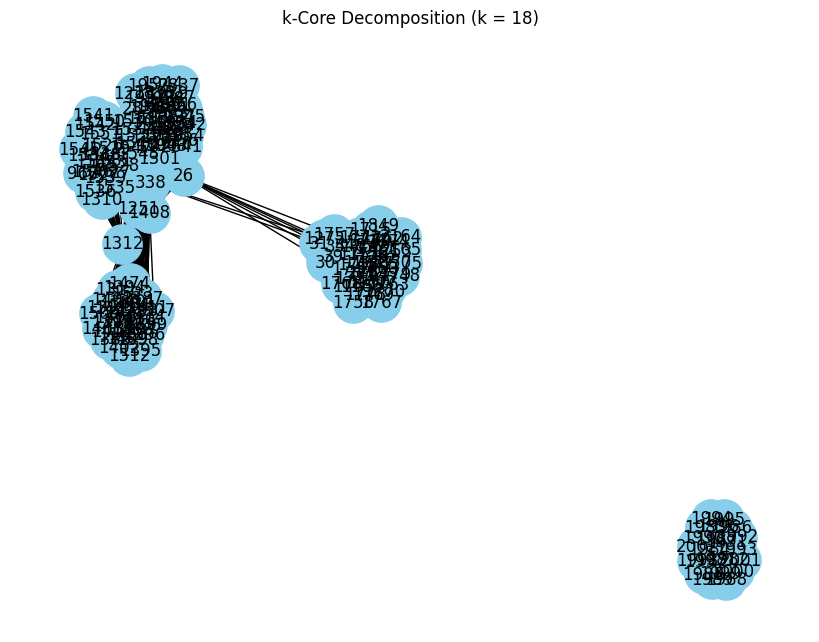

There are 173 nodes in the 17-core subgraph


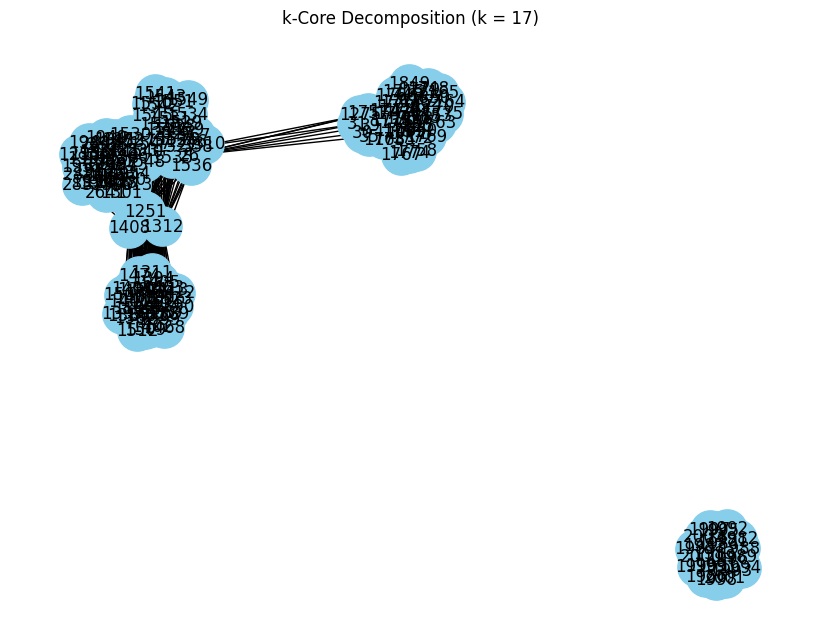

In [57]:
core_numbers = nx.core_number(G) 
# Extract the largest core number
max_core = max(core_numbers.values())
core_dict = {node: core for node, core in core_numbers.items()}

# Create a subgraph for each core and plot it
for k in range(max_core, max_core-15, -1):
    k_core_nodes = [node for node, core in core_dict.items() if core >= k]
    print(f"There are {len(k_core_nodes)} nodes in the {k}-core subgraph") 
    k_core = G.subgraph(k_core_nodes)
    
    # Plot the k-core subgraph
    pos = nx.spring_layout(k_core, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(k_core, pos, with_labels=True, node_color='skyblue', node_size=800)
    plt.title(f'k-Core Decomposition (k = {k})')
    plt.show()

## Comparison to simulated networks

In [21]:
# Generate a Barabási-Albert random graph with 10,000 nodes and m=5, where m is the number of edges to attach from a new node to existing nodes
n = 10000
m = 2
BA = nx.barabasi_albert_graph(n, m)


edges_ba = BA.size() 
s_ba = len(list(nx.connected_components(BA)))
nodes_ba = len(nx.nodes(BA)) 
has_self_loops_ba = len(list(nx.selfloop_edges(BA)))  > 0 

print(f"The network is made up of {s_ba} connected component") # no isolated nodes 
print(f"It consists of {nodes_ba} nodes") 
print(f'The network is made up of {edges_ba} edges')  
if not has_self_loops_ba: 
    print("No self loops") 

The network is made up of 1 connected component
It consists of 10000 nodes
The network is made up of 19996 edges
No self loops


In [22]:
degrees_ba = nx.degree(BA)  

avg_degree_ba = 0.0 
max_degree_ba = max(n for _, n in degrees_ba)  
for _ , deg in degrees_ba: 
    avg_degree_ba += deg
avg_degree_ba = avg_degree_ba / nodes_ba ; 

In [23]:
density_ba = nx.density(BA)

In [24]:
avg_distance_ba = nx.average_shortest_path_length(BA) # small world, d ~ log(10_000) 

In [25]:
diameter_ba = nx.diameter(BA) 

In [26]:
clustering_coefficients_ba = nx.clustering(BA) 
avg_clustering_coefficient_ba = nx.average_clustering(BA)  

In [27]:
assortativity_ba = nx.degree_assortativity_coefficient(BA) 

In [ ]:
# Compute centrality metrics (some may take a long time for a network of this size)
degree_centrality_ba = nx.degree_centrality(BA)
closeness_centrality_ba = nx.closeness_centrality(BA)
betweenness_centrality_ba = nx.betweenness_centrality(BA)
eigenvector_centrality_ba = nx.eigenvector_centrality(BA)

In [62]:
print(f"Betweenness Centrality:\t\t{np.mean(list(betweenness_centrality_ba.values())):3.5f}.") 
print(f"Degree Centrality:\t\t{np.mean(list(degree_centrality_ba.values())):3.5f}.") 
print(f"Closeness Centrality:\t\t{np.mean(list(closeness_centrality_ba.values())):3.5f}.") 
print(f"Eigenvector Centrality:\t\t{np.mean(list(eigenvector_centrality_ba.values())):3.5f}.") 

Betweenness Centrality:		0.00041.
Degree Centrality:		0.00040.
Closeness Centrality:		0.19747.
Eigenvector Centrality:		0.00297.


In [64]:
# clustering comparison 
print(f"PGP network clustering coefficient: {avg_clustering_coefficient:3.2f} vs BA network coefficient: {avg_clustering_coefficient_ba:3.2}") 

PGP network clustering coefficient: 0.27 vs BA network coefficient: 0.0029


In [63]:
print(f"Average degree(BA):\t\t{avg_degree_ba:3.2f}.") 
print(f"Maximum degree(BA):\t\t{max_degree_ba:3.2f}.") 
print(f"Density (BA):    \t\t{density_ba:3.7f}") 
print(f"Average distance(BA):\t\t{avg_distance_ba:3.2f}") 
print(f"Diameter(BA):\t\t\t{diameter_ba:3.2f}") 
print(f"Clustering coefficient(BA):\t{avg_clustering_coefficient_ba:3.2f}")   
print(f"Assortativity(BA):\t\t{assortativity_ba:3.2f}") # not really assortative


Average degree(BA):		4.00.
Maximum degree(BA):		212.00.
Density (BA):    		0.0004000
Average distance(BA):		5.11
Diameter(BA):			9.00
Clustering coefficient(BA):	0.00
Assortativity(BA):		-0.04


[1] The Network Data Repository with Interactive Graph Analytics and Visualization,
     Ryan A. Rossi and Nesreen K. Ahmed},
     AAAI,
     https://networkrepository.com
     2015